## モジュールのインポート

In [1]:
import numpy as np #数値計算を効率的に行うためのモジュールのimport
import matplotlib.pyplot as plt #グラフ描画モジュールのimport

## 波形データのロード

In [2]:
#data = np.load('./../data/32bit_aes_data') #32bitの場合、こちらを選択
data = np.load('./data/8bit_AES_data.npz') #8bitの場合、こちらを選択

In [3]:
data.files #dataの中身を確認

['plain', 'trace', 'cipher', 'key']

#### データには、plain(平文データ), key(暗号化に使われたデータ), cipher(暗号文データ), trace(暗号時の消費電力データ)が含まれている

In [4]:
#data['???']...???の部分でどのデータをロードするか指定できる
plain = data['plain']
cipher = data['cipher']
key = data['key']
trace = data['trace']

## データの中身を確認

In [5]:
print(plain.shape, cipher.shape, key.shape, trace.shape)

(1000, 16) (1000, 16) (16,) (1000, 5000)


#### 16byteの平文を、16byteの固定鍵を用いて暗号化
##### Traceは1波形あたり5000sample含まれる

In [6]:
print(plain[0])
print(cipher[0])
print(key)

[230 110  57 112   7  36 228  95 203  72  93  54 121 253 223 173]
[189  40  76 132 182 150  19 194   0   5 221   9 222 192  31 151]
[195  27 200 241  36 186 220 106 129  42 160 108 245 228  68 198]


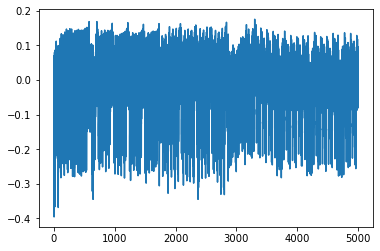

In [7]:
#matplotlibを使って、波形を図示
plt.plot(trace[0])

### 波形のどの部分に攻撃するかどうかを選択する

<img src="poi.png">

#### ・AESに対してCPAを行う場合、SubBytes処理箇所を攻撃箇所として使用する
#### ・8bitの場合:1000~2100サンプルポイント(1R目のSubBytes処理箇所)を選択
#### ・32bitの場合：0~1000サンプルポイント(1R目の処理箇所)を選択

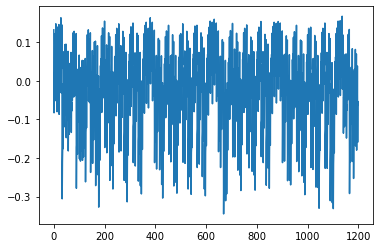

In [8]:
trace = trace[:, 1700:2900] #8bitの場合、こちらを選択
#trace = trace[:, 0:1000] #32bitの場合、こちらを選択
plt.plot(trace[0])

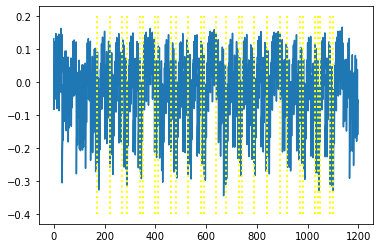

In [18]:
plt.plot(trace[0], zorder=0.5)
plt.vlines(170, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(220, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(410, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(460, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(680, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(730, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(920, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(970, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(220, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(270, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(480, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(530, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(740, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(790, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(980, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(1030, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(290, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(340, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(530, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(580, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(790, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(840, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(1040, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(1090, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(350, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(400, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(590, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(640, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(840, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(890, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(1050, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)
plt.vlines(1100, -0.4, 0.2, zorder=1, colors='yellow', linestyle='dotted', linewidth=2)

## CPAを実施する

### CPAを実施するためには、攻撃モデルを導出する必要がある。

**AES暗号**は主に以下の四つの処理を繰り返して暗号化する

- Key Addition
- SubBytes
- ShiftRows
- MixColumns<img src="shori.jpg">

### 攻撃モデル(SBox出力のLSB)を求める

#### まずは、推定鍵毎にSBoxへの入力を求める

In [9]:
sbox_in = []
for estimated_key in range(256): #256通りの推定鍵だけ繰り返す。
    sbox_in.append(plain^np.array([estimated_key]*16)) #平文と推定鍵のXORがSbox(SubBytes)入力
sbox_in = np.array(sbox_in)
print(sbox_in.shape)

(256, 1000, 16)


##### shapeは(推定鍵、波形数、byte)を示す。

### そして、S-box表を用いて、SubBytes処理の出力を求める

In [10]:
AES_Sbox = np.array([
			0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
			0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
			0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
			0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
			0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
			0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
			0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
			0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
			0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
			0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
			0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
			0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
			0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
			0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
			0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
			0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
			])

In [11]:
sbox_out = np.array([AES_Sbox[i] for i in sbox_in])
sbox_out.shape

(256, 1000, 16)

## HWを求める
### HW表を用いて求める

In [12]:
#HW表の導出
hw = []
for i in range(256): #HW表は256通りの入力
    v = 0
    for b in range(8): v += (i >> b) & 0x01 #最下位ビットの値を足して、1bitシフト ← これを8回繰り返して、HWを求める
    hw.append(v)
hw = np.array(hw)

### hwの添え字にHWを求めたい値を指定すると、その値のHWが返される

In [13]:
print(hw[0], hw[1], hw[2], hw[3], hw[4], hw[5], hw[6])

0 1 1 2 1 2 2


##### hwを用いて、S-box出力値のHWを導出

In [14]:
#SubBytes処理と同じような動作
sbox_out_hw = np.array([hw[i] for i in sbox_out])
sbox_out_hw.shape

(256, 1000, 16)

## 波形数のチェック

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm import trange
from pearsonr import pearsonr2

# st, fn, stepを変更して、実行すること
### st...何波形目からか
### fn...何波形目までか
### st...何波形ずつか

### sn = 0, fn = 1000, st = 1だと、0波形から1000波形まで1波形ずつ変化させてCPAを行う。

In [16]:
instances = []
corrs_allbyte = []
corrs_all = []

recovered_key = [] #攻撃成功バイト数 格納用
candidates = np.arange(256).astype(np.uint8) #鍵候補の指定(0~255)

st, fn, step = (0, 50, 1) # fn:何波形使用するか、step:何波形毎に相関を求める｜ st, fn, step = (0, 200, 1)だと、200波形まで、1波形毎に相関を求める

for i in trange(st, fn, step):
    count = 0 #ある波形での攻撃成功バイト数記録用
    corrs_allbyte = [] #相関格納用
    for target_byte in range(16): #ターゲットバイト数だけ繰り返す
        corrs = []
        for idx, k in enumerate(candidates): #鍵候補の数だけ繰り返す
            if i == 0:
                instances.append(pearsonr2())
            p = instances[target_byte*256+idx] #instances classに相関が保存されている
            corr = p(sbox_out_hw[k,i:i+step,target_byte].astype(np.int64), trace[i:i+step].astype(np.float64)) #相関の更新
            
            corrs.append(corr)
        if np.argmax(np.max(np.abs(corrs), axis = 1)) == key[target_byte]: #推定した鍵と正解鍵が一致しているかを確認
            count += 1
        
    recovered_key.append(count) #攻撃成功バイト数の保存
recovered_key = np.array(recovered_key)

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\ri0099vh\CHIPWH~1\cw\home\portable\chipwhisperer\jupyter\fujinolab_jupyter\pearsonr.py:54: RuntimeWarning: invalid value encountered in true_divide
  (self.t_sum**2 - self.num*self.t_sq_sum)
100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


### recovered_keyに攻撃成功バイト数が保存される

[ 0. 10. 20. 30. 40. 50.]


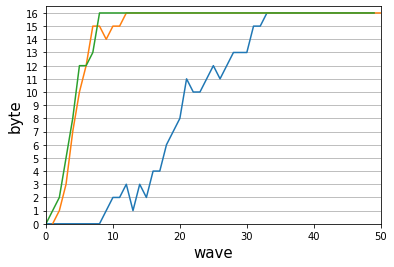

In [17]:
plt.plot(recovered_key)
plt.ylim([0,16.5])
plt.xlim(0, len(recovered_key))
plt.yticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
xticks, strs = plt.xticks()
recovered_key0 = np.load('test0.npy')
recovered_key1 = np.load('test1.npy')
recovered_key2 = np.load('test2.npy')
recovered_key3 = np.load('test3.npy')
recovered_key4 = np.load('test4.npy')
recovered_key5 = np.load('test5.npy')
recovered_key6 = np.load('test6.npy')
recovered_key7 = np.load('test7.npy')
recovered_key8 = np.load('test8.npy')
recovered_key9 = np.load('test9.npy')
recovered_key10 = np.load('test10.npy')
recovered_key11 = np.load('test11.npy')
recovered_key12 = np.load('test12.npy')
recovered_key13 = np.load('test13.npy')
recovered_key14 = np.load('test14.npy')
recovered_key15 = np.load('test15.npy')

A = recovered_key0 + recovered_key1 + recovered_key2 + recovered_key3 + recovered_key4 + recovered_key5 + recovered_key6 + recovered_key7 + recovered_key8 + recovered_key9 + recovered_key10 + recovered_key11 + recovered_key12 + recovered_key13 + recovered_key14 + recovered_key15
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
y = [0,1,3,7,10,12,15,15,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16]
print(xticks)
plt.plot(x,y,A)
plt.xticks(xticks, ["%d" % x for x in step * (xticks)])
plt.xlabel('wave', fontsize = 15)
plt.ylabel('byte', fontsize = 15)
plt.grid(which = "both", axis="y")

In [18]:
# corrs に全推定鍵の相関値が格納されている
corrs.shape

AttributeError: 'list' object has no attribute 'shape'